In [3]:
#left and right disparity map using stereo sgbm
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import numpy as np
from sklearn.preprocessing import normalize
import cv2
import matplotlib.pyplot as plt
import imageio
get_ipython().run_line_magic('matplotlib', 'inline')
import random

random.seed(10)

In [4]:
# In[2]:

imgL = cv2.imread("cones/im2.png",0)
imgR = cv2.imread("cones/im6.png",0)


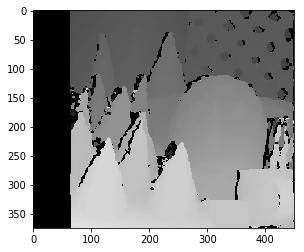

In [5]:
# In[3]:


# SGBM Parameters -----------------
window_size = 3                     # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely
 
left_matcher = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=64,             # max_disp has to be dividable by 16 f. E. HH 192, 256
    blockSize=5,
    P1=8 * 3 * window_size ** 2,    # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely
    P2=32 * 3 * window_size ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=15,
    speckleWindowSize=0,
    speckleRange=2,
    preFilterCap=63,
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
)
disparity = left_matcher.compute(imgL,imgR)
plt.imshow(disparity,'gray')
imageio.imwrite("MYLEFT IMAGE.png",disparity)
plt.show()




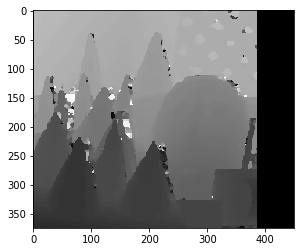

In [6]:
# In[4]:


right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)
disparity1 = right_matcher.compute(imgR,imgL)
plt.imshow(disparity1,'gray')
imageio.imwrite("MYRIGHT IMAGE.png",disparity1)
plt.show()




In [7]:
# In[5]:


# FILTER Parameters
lmbda = 80000
sigma = 1.2
visual_multiplier = 1.0
 
wls_filter = cv2.ximgproc.createDisparityWLSFilter(left_matcher)
wls_filter.setLambda(lmbda)
wls_filter.setSigmaColor(sigma)




computing disparity...


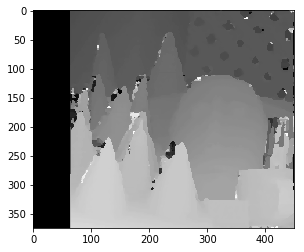

In [8]:
# In[6]:


print('computing disparity...')
displ = left_matcher.compute(imgL, imgR)  # .astype(np.float32)/16
dispr = right_matcher.compute(imgR,imgL)
plt.imshow(displ,'gray')
imageio.imwrite("MYLEFT IMAGE2.png",displ)# .astype(np.float32)/16




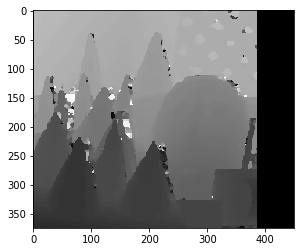

In [9]:
# In[7]:


plt.imshow(dispr,'gray')
imageio.imwrite("MYRIGHT IMAGE2.png",dispr)




In [10]:
# In[8]:


displ = np.int16(displ)
dispr = np.int16(dispr)
#cv2.imwrite("LEFT MATCHER.png",displ)
#cv2.imwrite("RIGHT MATCHER.png",dispr)
filteredImg = wls_filter.filter(displ, imgL, None, dispr)  # important to put "imgL" here!!!




In [11]:
# In[9]:


filteredImg = cv2.normalize(src=filteredImg, dst=filteredImg, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX);
filteredImg = np.uint8(filteredImg)
cv2.imshow('Disparity Map', filteredImg)
imageio.imwrite("Disparity Map.png",filteredImg)
cv2.waitKey()
cv2.destroyAllWindows()
